In [1]:
#Data Preparation 

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [2]:
# Reading whale returns
whale_returns = pd.read_csv("/Users/katharinezenta/Downloads/whale_returns.csv")
whale_returns.head(10)

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
6,2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
7,2015-03-11,0.004012,0.005163,0.003312,-0.001147
8,2015-03-12,0.008265,0.010272,0.013117,0.010801
9,2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142


In [3]:
whale_returns.shape

(1060, 5)

In [4]:
whale_returns.count()

Date                           1060
SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [5]:
# Count nulls
whale_returns.isnull().mean() * 100

Date                           0.00000
SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [6]:
# Removing the nulls
whale_returns = whale_returns.dropna().copy()

In [7]:
#Checking to see if the nulls are removed
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [8]:
whale_returns.shape

(1059, 5)

In [9]:
whale_returns = whale_returns.set_index(pd.to_datetime(whale_returns["Date"], infer_datetime_format=True))
whale_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [10]:
whale_returns = whale_returns.drop(columns=["Date"])
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [11]:
# Reading algorithmic returns
algo_returns = pd.read_csv("/Users/katharinezenta/Downloads/algo_returns.csv")
algo_returns.head(10)

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
5,2014-06-04,-0.001838,NaN
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735


In [12]:
algo_returns.shape

(1241, 3)

In [13]:
algo_returns.count()

Date      1241
Algo 1    1241
Algo 2    1235
dtype: int64

In [14]:
# Next I will count nulls
algo_returns.isnull().mean() * 100

Date      0.000000
Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [15]:
#Remove the nulls in the following
algo_returns = algo_returns.dropna().copy()

In [16]:
#Checking to see if the nulls are removed
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [17]:
algo_returns.shape

(1235, 3)

In [18]:
algo_returns.head()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


In [19]:
algo_returns = algo_returns.set_index(pd.to_datetime(algo_returns["Date"], infer_datetime_format=True))
algo_returns.head()

,Date,Algo 1,Algo 2
Date,,,
2014-06-05,2014-06-05,0.004062,0.013285
2014-06-06,2014-06-06,0.001857,0.008284
2014-06-09,2014-06-09,-0.005012,0.005668
2014-06-10,2014-06-10,0.004406,-0.000735
2014-06-11,2014-06-11,0.004760,-0.003761


In [20]:
algo_returns = algo_returns.drop(columns=["Date"])
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [21]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history = pd.read_csv("/Users/katharinezenta/Downloads/sp_tsx_history.csv")
sp_tsx_history.head(10)


,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"
5,9-Oct-2012,"$12,273.57"
6,10-Oct-2012,"$12,212.42"
7,11-Oct-2012,"$12,233.95"
8,12-Oct-2012,"$12,202.04"
9,15-Oct-2012,"$12,229.96"


In [22]:
sp_tsx_history.shape

(1818, 2)

In [23]:
sp_tsx_history.count()

Date     1818
Close    1818
dtype: int64

In [24]:
# Check Data Types
type(sp_tsx_history)

pandas.core.frame.DataFrame

In [25]:
type(sp_tsx_history['Close']) 

pandas.core.series.Series

In [26]:
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace("$", "")

/Users/katharinezenta/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [29]:
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace(",", "")

In [30]:
sp_tsx_history["Close"].dtype

dtype('O')

In [31]:
#I will fix the data type 
sp_tsx_history['Close'] = sp_tsx_history['Close'].astype('float')
sp_tsx_history['Close'].dtype

dtype('float64')

In [32]:
sp_tsx_history.head()

,Date,Close
0,1-Oct-2012,12370.19
1,2-Oct-2012,12391.23
2,3-Oct-2012,12359.47
3,4-Oct-2012,12447.68
4,5-Oct-2012,12418.99


In [33]:
# Calculate Daily Returns
# I will also change the date column to an index to clean up the data a little more and focus the data on the returns
sp_tsx_history = sp_tsx_history.set_index(pd.to_datetime(sp_tsx_history["Date"], infer_datetime_format=True))
sp_tsx_history = sp_tsx_history.drop(columns=["Date"])
sp_tsx_history.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [34]:
sp_tsx_daily_returns = sp_tsx_history.pct_change()
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [ ]:
#Dropping the nulls

In [35]:
#Dropping the nulls
sp_tsx_daily_returns.isnull().mean() * 100

Close    0.055006
dtype: float64

In [36]:
sp_tsx_daily_returns = sp_tsx_daily_returns.dropna().copy()

In [37]:
sp_tsx_daily_returns.isnull().sum()

Close    0
dtype: int64

In [39]:
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [43]:
# I will rename `Close` Column to 'S&P TSX 60 Returns'
sp_tsx_daily_returns.rename(columns={'Close': "S&P TSX 60 Returns"}, inplace=True)
sp_tsx_daily_returns.head()

,S&P TSX 60 Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [44]:
# I will join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns
df = pd.concat(
    [whale_returns, algo_returns, sp_tsx_daily_returns], axis="columns", join="inner"
)
df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [112]:
#Quantitative Analysis

In [45]:
#Preformance Analysis
# I will begin by calculating and plotting daily returns of all portfolios

In [115]:
whale_returns.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


<AxesSubplot:xlabel='Date'>

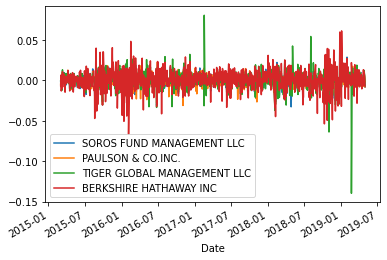

In [116]:
whale_returns.plot()

In [121]:
#I will plot the columns individually to have a better visualiztion of the daily returns

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

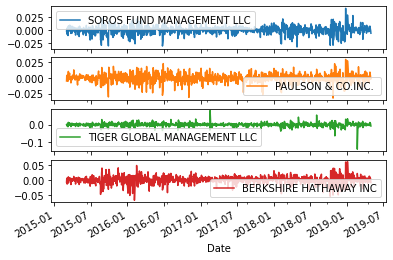

In [120]:
whale_returns.plot(subplots = True)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

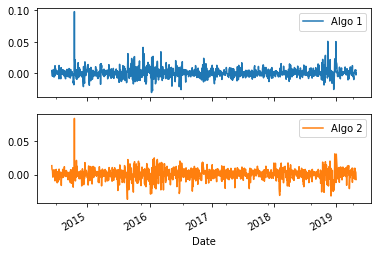

In [122]:
algo_returns.plot(subplots = True)

<AxesSubplot:xlabel='Date'>

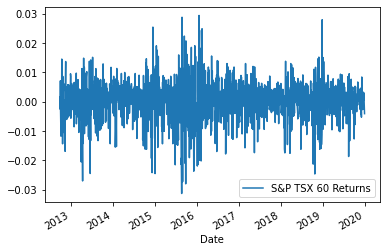

In [131]:
sp_tsx_daily_returns.plot()

In [126]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns
whale_cumulative_returns = (1 + whale_returns).cumprod()
whale_cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431
2015-03-04,1.000962,0.998245,0.996972,0.997617
2015-03-05,1.004981,1.002314,0.999319,1.004327
2015-03-06,0.997037,0.998731,0.990844,0.991172
2015-03-09,0.997617,1.002951,0.996633,0.989534


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

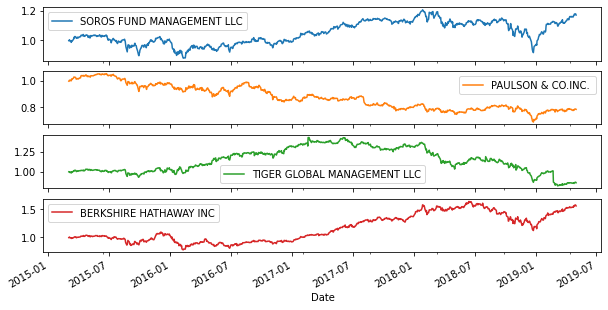

In [128]:
whale_cumulative_returns.plot(figsize=(10,5), subplots = True)

In [129]:
algo_cumulative_returns = (1 + algo_returns).cumprod()
algo_cumulative_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,1.004062,1.013285
2014-06-06,1.005927,1.021679
2014-06-09,1.000885,1.027470
2014-06-10,1.005295,1.026714
2014-06-11,1.010081,1.022852


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

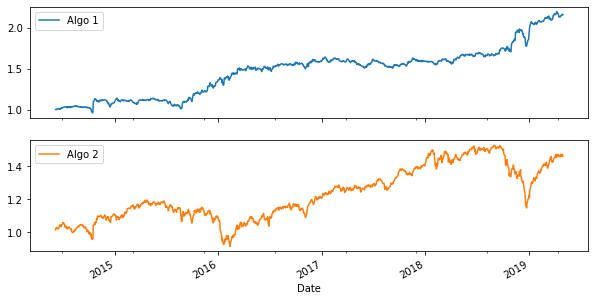

In [130]:
algo_cumulative_returns.plot(figsize=(10,5), subplots = True)

In [133]:
sp_tsx_cumulative_returns = (1 + sp_tsx_daily_returns).cumprod()
sp_tsx_cumulative_returns.head()

,S&P TSX 60 Returns
Date,
2012-10-02,1.001701
2012-10-03,0.999133
2012-10-04,1.006264
2012-10-05,1.003945
2012-10-09,0.992189


array([<AxesSubplot:xlabel='Date'>], dtype=object)

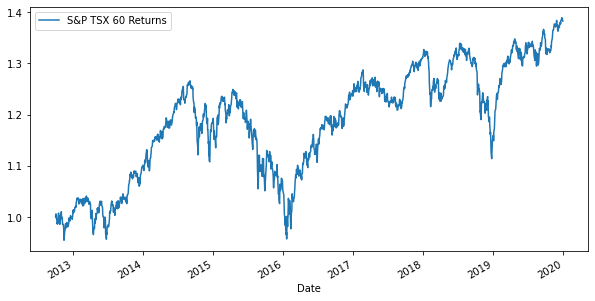

In [134]:
sp_tsx_cumulative_returns.plot(figsize=(10,5), subplots = True)

In [334]:
df_cumulative_returns = (1 + df).cumprod()
df_cumulative_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Returns
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168
2015-03-10,0.987379,0.997595,0.984595,0.979897,0.976921,0.983462,0.959232
2015-03-11,0.991340,1.002746,0.987855,0.978774,0.979846,0.984056,0.965615
2015-03-12,0.999533,1.013045,1.000813,0.989346,0.976971,0.995537,0.967680
2015-03-13,0.997037,1.011598,0.997113,0.981290,0.971673,0.990498,0.965111


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

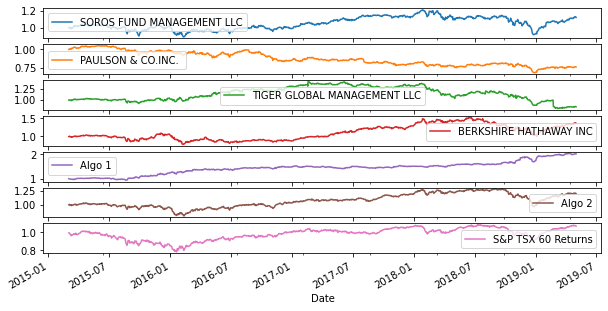

In [335]:
df_cumulative_returns.plot(figsize=(10,5), subplots = True)

In [114]:
#Risk Analysis

In [ ]:
# Box plot to visually show risk

<AxesSubplot:>

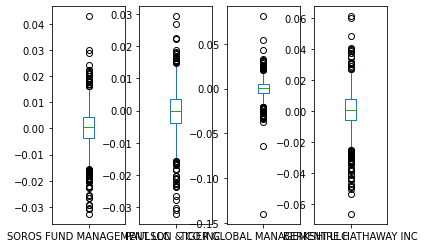

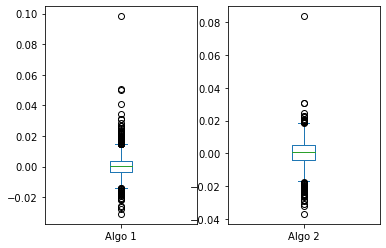

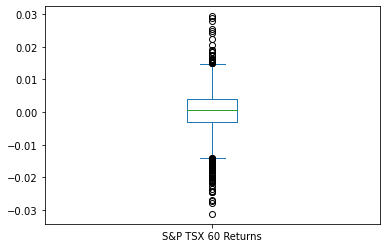

In [ ]:
whale_returns.plot.box(subplots = True)
algo_returns.plot.box(subplots = True)
sp_tsx_daily_returns.plot.box()

SOROS FUND MANAGEMENT LLC         AxesSubplot(0.125,0.125;0.0945122x0.755)
PAULSON & CO.INC.              AxesSubplot(0.238415,0.125;0.0945122x0.755)
TIGER GLOBAL MANAGEMENT LLC    AxesSubplot(0.351829,0.125;0.0945122x0.755)
BERKSHIRE HATHAWAY INC         AxesSubplot(0.465244,0.125;0.0945122x0.755)
Algo 1                         AxesSubplot(0.578659,0.125;0.0945122x0.755)
Algo 2                         AxesSubplot(0.692073,0.125;0.0945122x0.755)
S&P TSX 60 Returns             AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

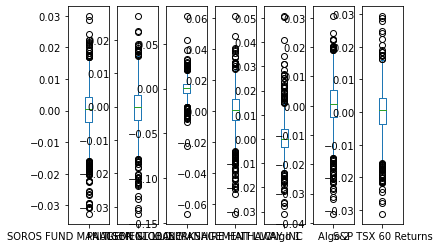

In [336]:
df.plot.box(subplots = True)

<AxesSubplot:>

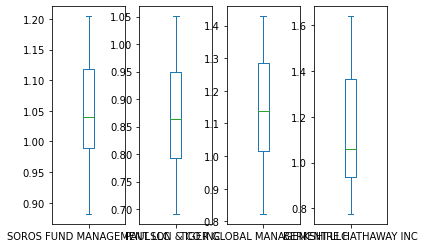

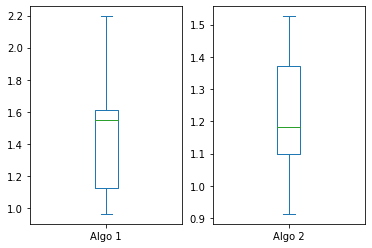

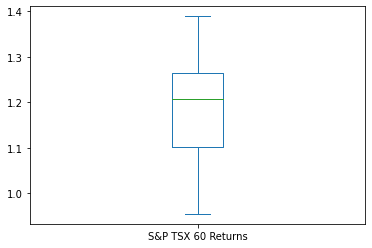

In [140]:
whale_cumulative_returns.plot.box(subplots = True)
algo_cumulative_returns.plot.box(subplots = True)
sp_tsx_cumulative_returns.plot.box()

In [141]:
# Calculate the daily standard deviations of all portfolios

In [146]:
whale_daily_std = whale_returns.std()
whale_daily_std.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [147]:
algo_daily_std = algo_returns.std()
algo_daily_std.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [ ]:
# Calculate  the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60

In [148]:
sp_tsx_daily_std = sp_tsx_daily_returns.std()
sp_tsx_daily_std.head()

S&P TSX 60 Returns    0.006637
dtype: float64

In [152]:
df_daily_std = df.std()
df_daily_std.head(10)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60 Returns             0.007034
dtype: float64

In [153]:
df_daily_std = df_daily_std.sort_values(ascending=False)
df_daily_std.head(10)

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX 60 Returns             0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

In [161]:
#According to the daily returns standard deviation of each portfolio it appears that the following portfolios are riskier than the SP TSX 60
print(f'The portfolios that are presenting to be riskier than the SP TSX 60 are Berkshire Hathaway Inc, Tiger Global Management LLC, Algo 2, Soros Fund Managemnt LLC, and Algo 1.')

The portfolios that are presenting to be riskier than the SP TSX 60 are Berkshire Hathaway Inc, Tiger Global Management LLC, Algo 2, Soros Fund Managemnt LLC, and Algo 1.


In [142]:
# Calculate the annualized standard deviation (252 trading days)

In [163]:
df_annualized_std = df_daily_std * np.sqrt(252)
df_annualized_std.head(10)

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX 60 Returns             0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

<AxesSubplot:ylabel='Frequency'>

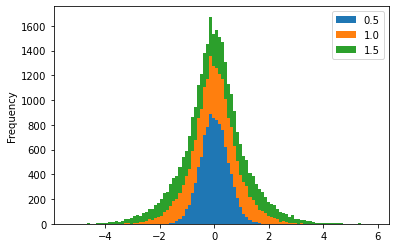

In [165]:
whale_daily_std = np.random.normal(scale=0.5, size=10000)
algo_daily_std = np.random.normal(scale=1.0, size=10000)
sp_tsx_daily_std = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "0.5": whale_daily_std,
    "1.0": algo_daily_std,
    "1.5": sp_tsx_daily_std,
})

portfolio_std.plot.hist(stacked=True, bins=100)

In [166]:
#I need help with the above plot as I'm not sure it is presenting the most accurate information of each portfolio 

In [167]:
#Rolling Statistics

In [174]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation

In [246]:
whale_returns['21 STD Soros'] = whale_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=21).std()
whale_returns['21 STD Paulson'] = whale_returns['PAULSON & CO.INC. '].rolling(window=21).std()
whale_returns['21 STD Tiger'] = whale_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).std()
whale_returns['21 STD Berkshire'] = whale_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).std()
whale_returns.head(22)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,21 day Soros,21 STD Soros,21 STD Paulson,21 STD Tiger,21 STD Berkshire
Date,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,NaN,NaN,NaN,NaN,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,NaN,NaN,NaN,NaN,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,NaN,NaN,NaN,NaN,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,NaN,NaN,NaN,NaN,NaN
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,NaN,NaN,NaN,NaN,NaN
2015-03-11,0.004012,0.005163,0.003312,-0.001147,NaN,NaN,NaN,NaN,NaN
2015-03-12,0.008265,0.010272,0.013117,0.010801,NaN,NaN,NaN,NaN,NaN
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

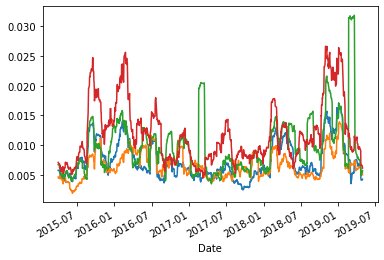

In [249]:
whale_returns['21 STD Soros'].plot()
whale_returns['21 STD Paulson'].plot()
whale_returns['21 STD Tiger'].plot()
whale_returns['21 STD Berkshire'].plot()

In [276]:
algo_returns['21 STD Algo 1'] = algo_returns['Algo 1'].rolling(window=21).std()
algo_returns['21 STD Algo 2'] = algo_returns['Algo 2'].rolling(window=21).std()
algo_returns.head(22)

,Algo 1,Algo 2,21 STD Algo 1,21 STD Algo 2
Date,,,,
2014-06-05,0.004062,0.013285,NaN,NaN
2014-06-06,0.001857,0.008284,NaN,NaN
2014-06-09,-0.005012,0.005668,NaN,NaN
2014-06-10,0.004406,-0.000735,NaN,NaN
2014-06-11,0.004760,-0.003761,NaN,NaN
2014-06-12,-0.000028,-0.003841,NaN,NaN
2014-06-13,0.001917,-0.000814,NaN,NaN
2014-06-16,0.001084,0.001831,NaN,NaN
2014-06-17,0.000922,0.006870,NaN,NaN


<AxesSubplot:xlabel='Date'>

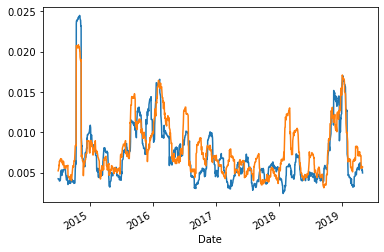

In [277]:
algo_returns['21 STD Algo 1'].plot()
algo_returns['21 STD Algo 2'].plot()

In [279]:
sp_tsx_daily_returns['21 STD S&P TSX'] = sp_tsx_daily_returns['S&P TSX 60 Returns'].rolling(window=21).std()
sp_tsx_daily_returns.head(22)

,S&P TSX 60 Returns,21 STD S&P TSX
Date,,
2012-10-02,0.001701,NaN
2012-10-03,-0.002563,NaN
2012-10-04,0.007137,NaN
2012-10-05,-0.002305,NaN
2012-10-09,-0.011709,NaN
2012-10-10,-0.004982,NaN
2012-10-11,0.001763,NaN
2012-10-12,-0.002608,NaN
2012-10-15,0.002288,NaN


<AxesSubplot:xlabel='Date'>

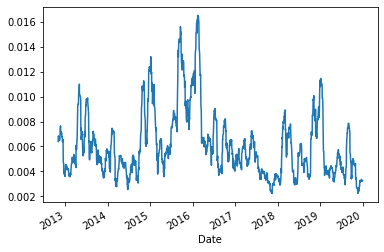

In [280]:
sp_tsx_daily_returns['21 STD S&P TSX'].plot()

In [ ]:
# Calculate the correlation

# Display de correlation matrix

In [ ]:
correlation = df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60 Returns,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

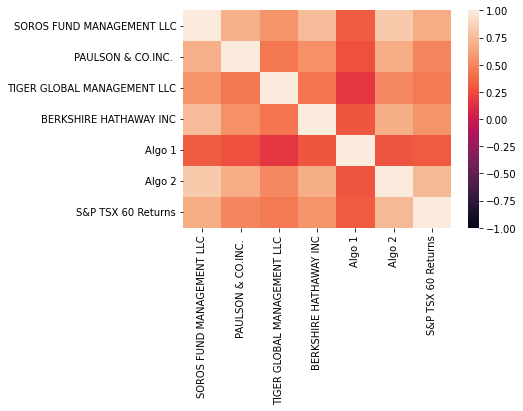

In [289]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [169]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P TSX

# Computing beta

# Plot beta trend

In [312]:
covariance = algo_returns['Algo 1'].cov(sp_tsx_daily_returns['S&P TSX 60 Returns'])
covariance

1.807619680366557e-05

In [303]:
sp_tsx_daily_returns = sp_tsx_daily_returns.drop(columns=['21 STD S&P TSX'])

In [304]:
sp_tsx_daily_returns.head()

,S&P TSX 60 Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [314]:
sp_tsx_variance = sp_tsx_daily_returns['S&P TSX 60 Returns'].var()
sp_tsx_variance

4.405458170898365e-05

In [309]:
#beta

In [316]:
algo1_beta = covariance / sp_tsx_variance
algo1_beta

0.4103136632433274

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Algo 1 Returns vs. S&P TSX 60 Returns'}, xlabel='Date'>

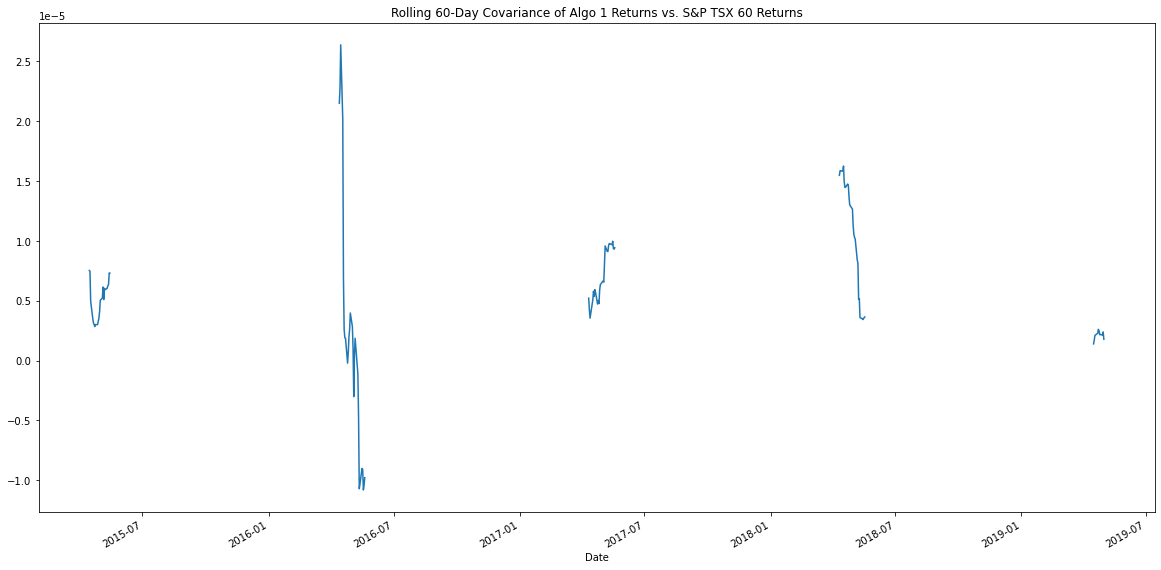

In [320]:
rolling_covariance = algo_returns['Algo 1'].rolling(window=60).cov(sp_tsx_daily_returns['S&P TSX 60 Returns'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Algo 1 Returns vs. S&P TSX 60 Returns')

<AxesSubplot:title={'center':'Rolling 60-Day Variance of S&P TSX 60 Returns'}, xlabel='Date'>

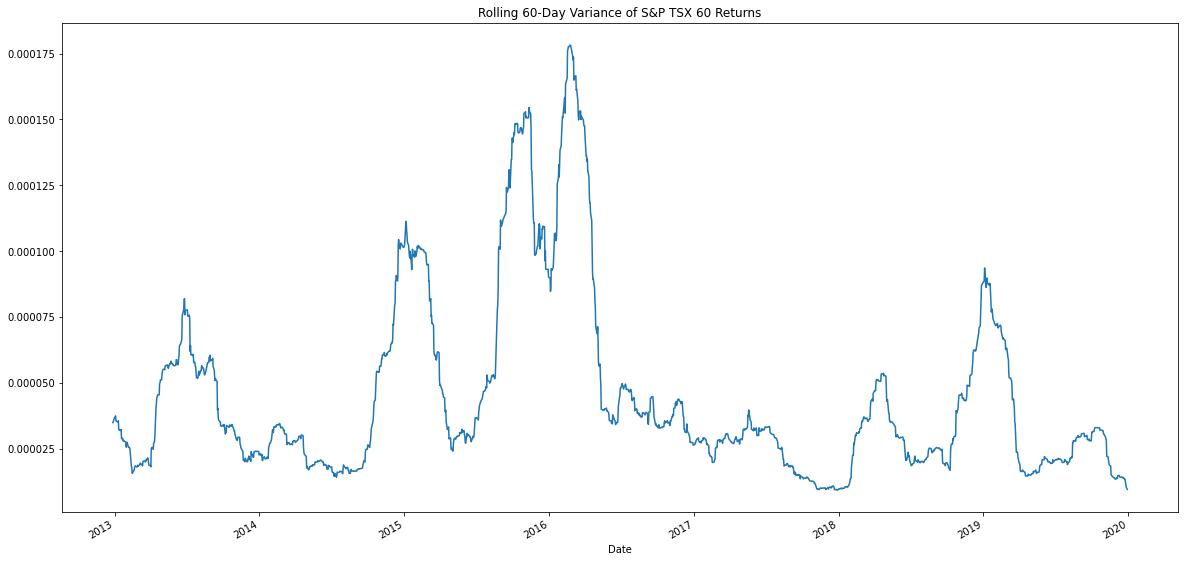

In [321]:
rolling_variance = sp_tsx_daily_returns['S&P TSX 60 Returns'].rolling(window=60).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 60-Day Variance of S&P TSX 60 Returns')

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1'}, xlabel='Date'>

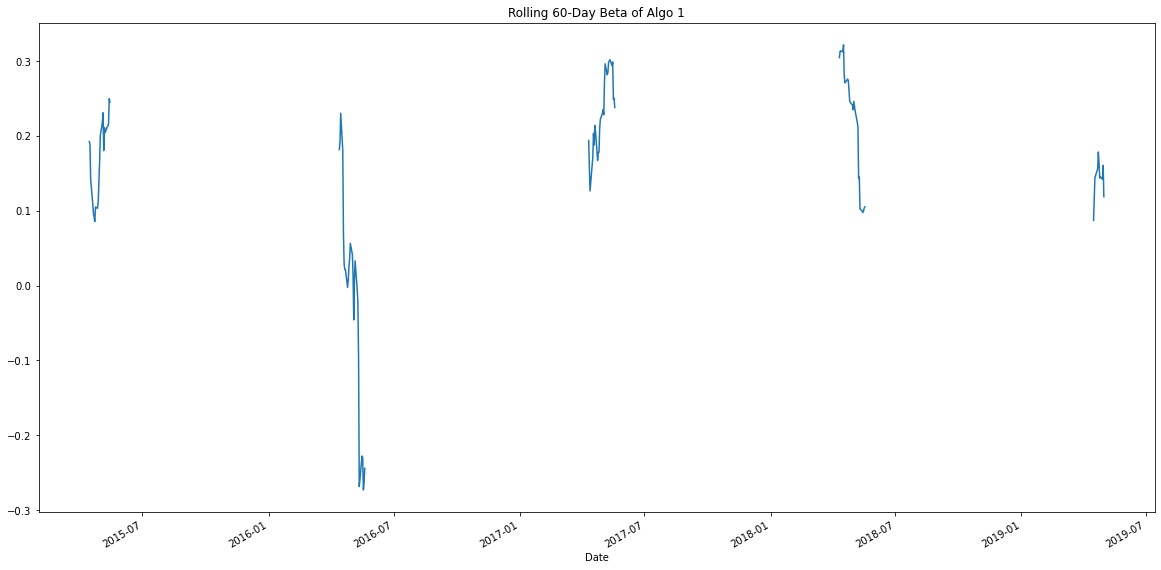

In [322]:
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1')

In [170]:
# Use `ewm` to calculate the rolling window

In [171]:
#Shape Ratios

In [323]:
# Annualized Sharpe Ratios 

In [325]:
sharpe_ratios = ((df.mean()-df['S&P TSX 60 Returns'].mean()) * 252) / (df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.110980
PAULSON & CO.INC.             -0.744596
TIGER GLOBAL MANAGEMENT LLC   -0.270851
BERKSHIRE HATHAWAY INC         0.359795
Algo 1                         1.310258
Algo 2                         0.231615
S&P TSX 60 Returns             0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

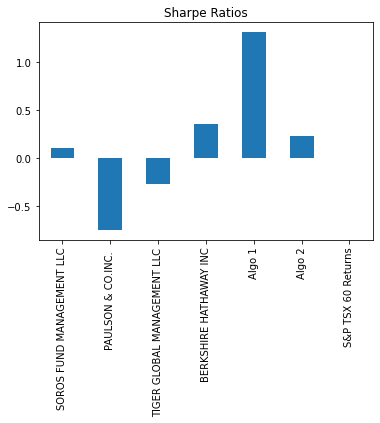

In [326]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [328]:
df_std = df.std()
df_std.head(10)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60 Returns             0.007034
dtype: float64

In [330]:
sharpe_ratios_overall = (df.mean() * 252) / (df_std * np.sqrt(252))
sharpe_ratios_overall.head(10)

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60 Returns             0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

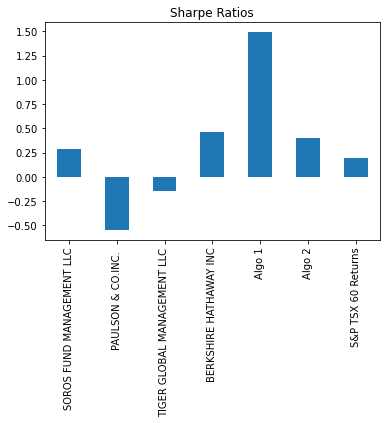

In [331]:
sharpe_ratios_overall.plot.bar(title="Sharpe Ratios")

In [332]:
# Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

In [3]:
print(f"According to the data anaylsis although the S&P TSX 60 is very stable and provides good returns, it does appear that algorithmic trading outperforms the other two portfolios, Particularily Algo 1 has the highest sharpe ratio.")

According to the data anaylsis although the S&P TSX 60 is very stable and provides good returns, it does appear that algorithmic trading outperforms the other two portfolios, Particularily Algo 1 has the highest sharpe ratio.


In [46]:
#Custom Portfolio 

In [ ]:
# Reading data from 1st stock
# Reading data from 2nd stock
# Reading data from 3rd stock
# Combine all stocks in a single DataFrame
# Reset Date index
# Reorganize portfolio data by having a column per symbol
# Calculate daily returns

# Drop NAs

# Display sample data

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data

In [ ]:
 # Join your returns DataFrame to the original returns DataFrame
  # Only compare dates where return data exists for all the stocks (drop NaNs)